In [ ]:
# Forming csv file from Tabula

In [ ]:
# forming pickle file after removing blank columns or inconsistent columns using VS Code

import pandas as pd

df = pd.DataFrame(columns = ['SubSl Roll No', "Name CSFather's Name Sub Cr1", 'GR1', 'GP1', 'CRP1', 'Sub Cr2', 'GR2', 'GP2', 'CRP2', 'Sub Cr3', 'GR3', 'GP3', 'CRP3', 'Sub Cr4', 'GR4', 'GP4', 'CRP4', 'Sub Cr5', 'GR5', 'GP5', 'CRP5', 'Sub Cr6', 'GR6', 'GP6', 'CRP6', 'TOT CR', 'TOT CRP', 'SGPA'])

mat = []
wrong = []

string = 'y'
while string != 'n':
    string = input()
    lst = string.split(',')
    lst2 = list(filter(None, lst))

    if len(lst2) != 28:
        wrong.append(lst2[0])
        continue

    mat.append(lst2)
    df.loc[len(df)] = lst2

print(wrong)

print(len(mat))

print(df)

df.to_pickle("final.pkl")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('final4.pkl')

In [ ]:
# Removing * from CRP (10 will convert to 1 using this approach)
df['CRP1'] = df['CRP1'].str[0]
df['CRP2'] = df['CRP2'].str[0]
df['CRP3'] = df['CRP3'].str[0]
df['CRP4'] = df['CRP4'].str[0]
df['CRP5'] = df['CRP5'].str[0]
df['CRP6'] = df['CRP6'].str[0]

In [3]:
df['GP1'] = df['GP1'].astype(int)
df['GP2'] = df['GP2'].astype(int)
df['GP3'] = df['GP3'].astype(int)
df['GP4'] = df['GP4'].astype(int)
df['GP5'] = df['GP5'].astype(int)
df['GP6'] = df['GP6'].astype(int)
df['TOT CR'] = df['TOT CR'].astype(int)
# df['TOT CRP'] = df['TOT CPR'].astype(int)
df['SGPA'] = df['SGPA'].astype(float)

In [4]:
# many columns are mixed; must be fixed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1207
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SubSl Roll No                 1208 non-null   object 
 1   Name CSFather's Name Sub Cr1  1208 non-null   object 
 2   GR1                           1208 non-null   object 
 3   GP1                           1208 non-null   int32  
 4   CRP1                          1208 non-null   object 
 5   Sub Cr2                       1208 non-null   object 
 6   GR2                           1208 non-null   object 
 7   GP2                           1208 non-null   int32  
 8   CRP2                          1208 non-null   object 
 9   Sub Cr3                       1208 non-null   object 
 10  GR3                           1208 non-null   object 
 11  GP3                           1208 non-null   int32  
 12  CRP3                          1208 non-null   object 
 13  Sub

In [5]:
df.head()

,SubSl Roll No,Name CSFather's Name Sub Cr1,GR1,GP1,CRP1,Sub Cr2,GR2,GP2,CRP2,Sub Cr3,...,GR5,GP5,CRP5,Sub Cr6,GR6,GP6,CRP6,TOT CR,TOT CRP,SGPA
0,FEMG20MG461 2018UBT1038,RAJ NANDINI 16MANISH BTBTC04 4,B+,7,28,BTBTC06 4,B+,7,28,BTBTC07 4,...,A,8,32,0,B+,7,0,20,124,6.2
1,FEMG20MG462 2018UBT1050,JYOTSNA JAIN 20VINAY KUMAR BTBTC04 4,A,8,32,BTBTC06 4,A+,9,36,BTBTC07 4,...,A,8,32,0,A+,9,0,20,164,8.2
2,FEMG20MG463 2019UBT1003,RISHABH 20RANVIR KUMAR SINGH BTBTC04 4,A,8,32,BTBTC06 4,B,6,24,BTBTC07 4,...,A,8,32,0,B+,7,0,20,148,7.4
3,FEMG20MG464 2019UBT1004,MRIGAKSHI GUPTA 20K K GUPTA BTBTC04 4,O,10,40,BTBTC06 4,O,10,40,BTBTC07 4,...,A+,9,36,0,A+,9,0,20,184,9.2
4,FEMG20MG465 2019UBT1005,VISHVA RAJ 16PRITHVI RAJ BTBTC04 4,A,8,32,BTBTC06 4,B,6,24,BTBTC07 4,...,A+,9,36,0,F,0,0*,20,124,6.2


In [6]:
# Splitting 1st column
df[['SubSl','Roll No']] = df['SubSl Roll No'].str.split(expand = True)
df['SubSl'] = df['SubSl'].str[:7]
df = df.drop('SubSl Roll No', axis = 1)
df.head()

,Name CSFather's Name Sub Cr1,GR1,GP1,CRP1,Sub Cr2,GR2,GP2,CRP2,Sub Cr3,GR3,...,CRP5,Sub Cr6,GR6,GP6,CRP6,TOT CR,TOT CRP,SGPA,SubSl,Roll No
0,RAJ NANDINI 16MANISH BTBTC04 4,B+,7,28,BTBTC06 4,B+,7,28,BTBTC07 4,A+,...,32,0,B+,7,0,20,124,6.2,FEMG20M,2018UBT1038
1,JYOTSNA JAIN 20VINAY KUMAR BTBTC04 4,A,8,32,BTBTC06 4,A+,9,36,BTBTC07 4,A+,...,32,0,A+,9,0,20,164,8.2,FEMG20M,2018UBT1050
2,RISHABH 20RANVIR KUMAR SINGH BTBTC04 4,A,8,32,BTBTC06 4,B,6,24,BTBTC07 4,A+,...,32,0,B+,7,0,20,148,7.4,FEMG20M,2019UBT1003
3,MRIGAKSHI GUPTA 20K K GUPTA BTBTC04 4,O,10,40,BTBTC06 4,O,10,40,BTBTC07 4,O,...,36,0,A+,9,0,20,184,9.2,FEMG20M,2019UBT1004
4,VISHVA RAJ 16PRITHVI RAJ BTBTC04 4,A,8,32,BTBTC06 4,B,6,24,BTBTC07 4,A,...,36,0,F,0,0*,20,124,6.2,FEMG20M,2019UBT1005


In [7]:
df["Name CSFather's Name Sub Cr1"].loc[0].split()[-2][0:7] + ' ' + df["Name CSFather's Name Sub Cr1"].loc[0].split()[-1]

'BTBTC04 4'

In [8]:
# splitting 'Name' & 'Sub Cr1'
df["Name CSFather's Name"] = np.nan
df["Name CSFather's Name"] = df["Name CSFather's Name"].astype(object)
df['Sub Cr1_old'] = np.nan
df['Sub Cr1_old'] = df['Sub Cr1_old'].astype(object)
for i in range(len(df)):
    df.at[i, "Name CSFather's Name"] = ' '.join(df["Name CSFather's Name Sub Cr1"].loc[i].split()[:-2])
    df.at[i, 'Sub Cr1_old'] = df["Name CSFather's Name Sub Cr1"].loc[i].split()[-2][0:7] + ' ' + df["Name CSFather's Name Sub Cr1"].loc[i].split()[-1]
df = df.drop("Name CSFather's Name Sub Cr1", axis = 1)
df.head()

,GR1,GP1,CRP1,Sub Cr2,GR2,GP2,CRP2,Sub Cr3,GR3,GP3,...,GR6,GP6,CRP6,TOT CR,TOT CRP,SGPA,SubSl,Roll No,Name CSFather's Name,Sub Cr1_old
0,B+,7,28,BTBTC06 4,B+,7,28,BTBTC07 4,A+,9,...,B+,7,0,20,124,6.2,FEMG20M,2018UBT1038,RAJ NANDINI 16MANISH,BTBTC04 4
1,A,8,32,BTBTC06 4,A+,9,36,BTBTC07 4,A+,9,...,A+,9,0,20,164,8.2,FEMG20M,2018UBT1050,JYOTSNA JAIN 20VINAY KUMAR,BTBTC04 4
2,A,8,32,BTBTC06 4,B,6,24,BTBTC07 4,A+,9,...,B+,7,0,20,148,7.4,FEMG20M,2019UBT1003,RISHABH 20RANVIR KUMAR SINGH,BTBTC04 4
3,O,10,40,BTBTC06 4,O,10,40,BTBTC07 4,O,10,...,A+,9,0,20,184,9.2,FEMG20M,2019UBT1004,MRIGAKSHI GUPTA 20K K GUPTA,BTBTC04 4
4,A,8,32,BTBTC06 4,B,6,24,BTBTC07 4,A,8,...,F,0,0*,20,124,6.2,FEMG20M,2019UBT1005,VISHVA RAJ 16PRITHVI RAJ,BTBTC04 4


In [9]:
# forming 'Sub Cr6' (was missing)
df['Sub Cr6'] = df['SubSl'] + ' ' + df['Sub Cr6']
df.head()

,GR1,GP1,CRP1,Sub Cr2,GR2,GP2,CRP2,Sub Cr3,GR3,GP3,...,GR6,GP6,CRP6,TOT CR,TOT CRP,SGPA,SubSl,Roll No,Name CSFather's Name,Sub Cr1_old
0,B+,7,28,BTBTC06 4,B+,7,28,BTBTC07 4,A+,9,...,B+,7,0,20,124,6.2,FEMG20M,2018UBT1038,RAJ NANDINI 16MANISH,BTBTC04 4
1,A,8,32,BTBTC06 4,A+,9,36,BTBTC07 4,A+,9,...,A+,9,0,20,164,8.2,FEMG20M,2018UBT1050,JYOTSNA JAIN 20VINAY KUMAR,BTBTC04 4
2,A,8,32,BTBTC06 4,B,6,24,BTBTC07 4,A+,9,...,B+,7,0,20,148,7.4,FEMG20M,2019UBT1003,RISHABH 20RANVIR KUMAR SINGH,BTBTC04 4
3,O,10,40,BTBTC06 4,O,10,40,BTBTC07 4,O,10,...,A+,9,0,20,184,9.2,FEMG20M,2019UBT1004,MRIGAKSHI GUPTA 20K K GUPTA,BTBTC04 4
4,A,8,32,BTBTC06 4,B,6,24,BTBTC07 4,A,8,...,F,0,0*,20,124,6.2,FEMG20M,2019UBT1005,VISHVA RAJ 16PRITHVI RAJ,BTBTC04 4


In [10]:
# finding stream from roll no.
df['Stream'] = df['Roll No'].str[5:7]
df.head()

,GR1,GP1,CRP1,Sub Cr2,GR2,GP2,CRP2,Sub Cr3,GR3,GP3,...,GP6,CRP6,TOT CR,TOT CRP,SGPA,SubSl,Roll No,Name CSFather's Name,Sub Cr1_old,Stream
0,B+,7,28,BTBTC06 4,B+,7,28,BTBTC07 4,A+,9,...,7,0,20,124,6.2,FEMG20M,2018UBT1038,RAJ NANDINI 16MANISH,BTBTC04 4,BT
1,A,8,32,BTBTC06 4,A+,9,36,BTBTC07 4,A+,9,...,9,0,20,164,8.2,FEMG20M,2018UBT1050,JYOTSNA JAIN 20VINAY KUMAR,BTBTC04 4,BT
2,A,8,32,BTBTC06 4,B,6,24,BTBTC07 4,A+,9,...,7,0,20,148,7.4,FEMG20M,2019UBT1003,RISHABH 20RANVIR KUMAR SINGH,BTBTC04 4,BT
3,O,10,40,BTBTC06 4,O,10,40,BTBTC07 4,O,10,...,9,0,20,184,9.2,FEMG20M,2019UBT1004,MRIGAKSHI GUPTA 20K K GUPTA,BTBTC04 4,BT
4,A,8,32,BTBTC06 4,B,6,24,BTBTC07 4,A,8,...,0,0*,20,124,6.2,FEMG20M,2019UBT1005,VISHVA RAJ 16PRITHVI RAJ,BTBTC04 4,BT


In [11]:
# 'Sub Cr1' & 'Sub Cr6' were interchanged for many entries using a simple algo to fix
df['Sub Cr1'] = np.nan
df['Sub Cr1'] = df['Sub Cr1'].astype(object)
for i in range(len(df)):
    if df['Sub Cr1_old'].loc[i] != 'FEMG20M 0':
        df.at[i, 'Sub Cr1'] = df['Sub Cr1_old'].loc[i]
    else:
        df.at[i, 'Sub Cr1'] = df['Sub Cr6'].loc[i]
    df.at[i, 'Sub Cr6'] = 'FEMG20M 0'

In [12]:
# saving the final fixed df
df = df[["Name CSFather's Name", 'Roll No', 'Stream', 'Sub Cr1', 'GR1', 'GP1', 'CRP1', 'Sub Cr2', 'GR2', 'GP2', 'CRP2', 'Sub Cr3', 'GR3', 'GP3', 'CRP3', 'Sub Cr4', 'GR4', 'GP4', 'CRP4', 'Sub Cr5', 'GR5', 'GP5', 'CRP5', 'Sub Cr6', 'GR6', 'GP6', 'CRP6', 'TOT CR', 'TOT CRP', 'SGPA']]

In [13]:
df.head()

,Name CSFather's Name,Roll No,Stream,Sub Cr1,GR1,GP1,CRP1,Sub Cr2,GR2,GP2,...,GR5,GP5,CRP5,Sub Cr6,GR6,GP6,CRP6,TOT CR,TOT CRP,SGPA
0,RAJ NANDINI 16MANISH,2018UBT1038,BT,BTBTC04 4,B+,7,28,BTBTC06 4,B+,7,...,A,8,32,FEMG20M 0,B+,7,0,20,124,6.2
1,JYOTSNA JAIN 20VINAY KUMAR,2018UBT1050,BT,BTBTC04 4,A,8,32,BTBTC06 4,A+,9,...,A,8,32,FEMG20M 0,A+,9,0,20,164,8.2
2,RISHABH 20RANVIR KUMAR SINGH,2019UBT1003,BT,BTBTC04 4,A,8,32,BTBTC06 4,B,6,...,A,8,32,FEMG20M 0,B+,7,0,20,148,7.4
3,MRIGAKSHI GUPTA 20K K GUPTA,2019UBT1004,BT,BTBTC04 4,O,10,40,BTBTC06 4,O,10,...,A+,9,36,FEMG20M 0,A+,9,0,20,184,9.2
4,VISHVA RAJ 16PRITHVI RAJ,2019UBT1005,BT,BTBTC04 4,A,8,32,BTBTC06 4,B,6,...,A+,9,36,FEMG20M 0,F,0,0*,20,124,6.2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1207
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name CSFather's Name  1208 non-null   object 
 1   Roll No               1208 non-null   object 
 2   Stream                1208 non-null   object 
 3   Sub Cr1               1208 non-null   object 
 4   GR1                   1208 non-null   object 
 5   GP1                   1208 non-null   int32  
 6   CRP1                  1208 non-null   object 
 7   Sub Cr2               1208 non-null   object 
 8   GR2                   1208 non-null   object 
 9   GP2                   1208 non-null   int32  
 10  CRP2                  1208 non-null   object 
 11  Sub Cr3               1208 non-null   object 
 12  GR3                   1208 non-null   object 
 13  GP3                   1208 non-null   int32  
 14  CRP3                  1208 non-null   object 
 15  Sub Cr4              

In [15]:
# Peformance by stream
mean_dict = {}
for i in df['Stream'].unique():
    mean_dict[i] = round(df[df['Stream'] == i]['SGPA'].mean(), 3)

{k: v for k, v in sorted(mean_dict.items(), key=lambda item: item[1])}    # sorting

{'BT': 7.339,
 'MP': 7.511,
 'EC': 7.617,
 'IC': 8.039,
 'ME': 8.237,
 'CO': 8.271,
 'EE': 8.334,
 'IT': 8.374,
 'MC': 8.469,
 'CS': 8.603}

In [16]:
# Average Grade per course 

course_dict = {}

for i in df['Sub Cr1'].unique():
    course_dict[i] = round(df[df['Sub Cr1'] == i]['GP1'].mean(), 3)

for i in df['Sub Cr2'].unique():
    course_dict[i] = round(df[df['Sub Cr2'] == i]['GP2'].mean(), 3)

for i in df['Sub Cr3'].unique():
    course_dict[i] = round(df[df['Sub Cr3'] == i]['GP3'].mean(), 3)

for i in df['Sub Cr4'].unique():
    course_dict[i] = round(df[df['Sub Cr4'] == i]['GP4'].mean(), 3)

for i in df['Sub Cr5'].unique():
    course_dict[i] = round(df[df['Sub Cr5'] == i]['GP5'].mean(), 3)
    
for i in df['Sub Cr6'].unique():
    course_dict[i] = round(df[df['Sub Cr6'] == i]['GP6'].mean(), 3)

{k: v for k, v in sorted(course_dict.items(), key=lambda item: item[1])}    # sorting

{'BTBTC08 4': 5.129,
 'MAMTC04 4': 5.311,
 'MAMEC07 4': 6.18,
 'MEMTC04 4': 6.713,
 'BTBTC06 4': 7.0,
 'ICMTC04 4': 7.057,
 'MAECC08 4': 7.164,
 'ECECC06 4': 7.195,
 'ECECC05 4': 7.238,
 'ITMTC04 4': 7.347,
 'MCMTC08 4': 7.547,
 'ECECC07 4': 7.643,
 'MEMEC07 4': 7.659,
 'ITECC06 4': 7.66,
 'ICICC06 4': 7.683,
 'FEMG20M 0': 7.69,
 'ECECC08 4': 7.805,
 'ICICC07 4': 7.821,
 'MCCSC05 4': 7.828,
 'CECSC05 4': 7.841,
 'MAMEC05 4': 7.918,
 'BTBTC04 4': 7.984,
 'MAMEC06 4': 7.984,
 'EEMTC04 4': 8.039,
 'ICCSC05 4': 8.049,
 'MEMEC06 4': 8.101,
 'BTBTC07 4': 8.113,
 'CAECC08 4': 8.169,
 'ECMTC04 4': 8.205,
 'EEECC08 4': 8.213,
 'EEEEC06 4': 8.22,
 'CECSC06 4': 8.25,
 'CECSC07 4': 8.255,
 'MEMEC08 4': 8.279,
 'CACSC07 4': 8.292,
 'ICECC08 4': 8.35,
 'CEECC08 4': 8.418,
 'MCCSC07 4': 8.422,
 'ITITC05 4': 8.442,
 'BTITC05 4': 8.468,
 'ITITC07 4': 8.558,
 'MEMEC05 4': 8.589,
 'CECSC04 4': 8.591,
 'EECSC05 4': 8.598,
 'EEEEC07 4': 8.598,
 'MCMTC04 4': 8.641,
 'CACSC05 4': 8.646,
 'ITITC08 4': 8.687,


<AxesSubplot:xlabel='Stream', ylabel='SGPA'>

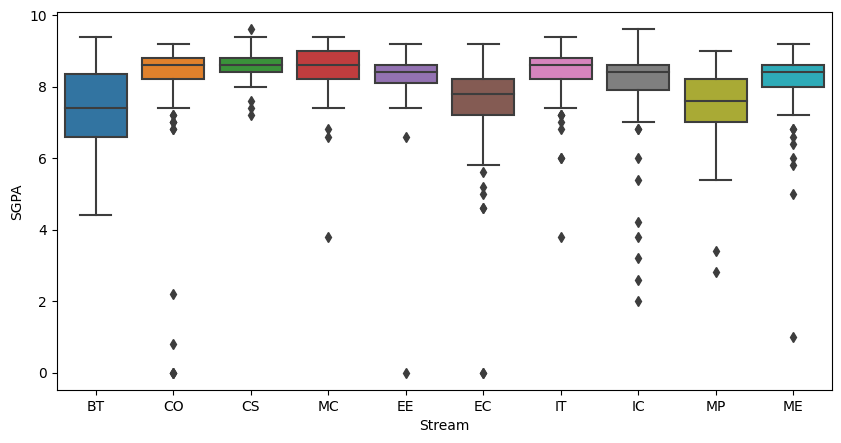

In [17]:
# performance per stream boxplot
plt.figure(figsize = (10,5), dpi = 100)
sns.boxplot(data = df, x = 'Stream', y = 'SGPA')

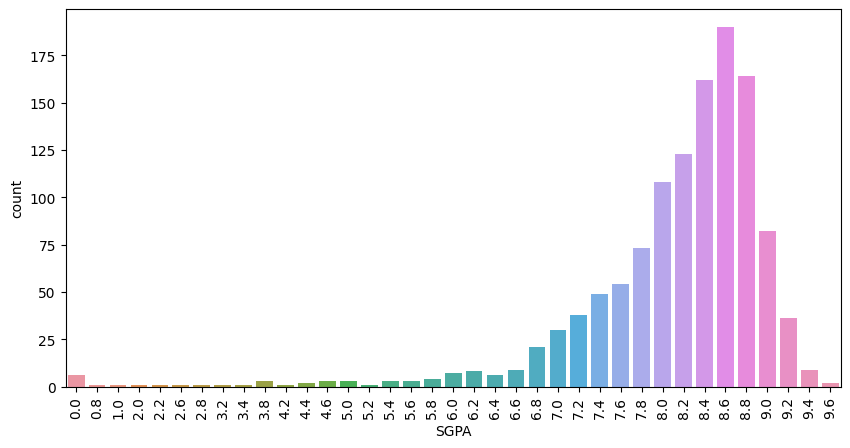

In [18]:
# 'SGPA' countplot
plt.figure(figsize = (10,5), dpi = 100)
sns.countplot(data = df, x = 'SGPA')
plt.xticks(rotation=90);

In [19]:
# REPORT

Roll = '2019UIC3590'

In [20]:
dfstream = df[df['Stream'] == df[df['Roll No'] == Roll]['Stream'].values[0]]  # df of your stream

yourgp = df[df['Roll No'] == Roll]['SGPA'].values[0]     # your gp

stot = dfstream.shape[0]                                      # total students in your stream
slower = dfstream[dfstream['SGPA'] < yourgp].shape[0]         # stream lower limit
supper = stot - dfstream[dfstream['SGPA'] > yourgp].shape[0]  # stream upper limit

ttot = df.shape[0]                                # total in univeristy
tlower = df[df['SGPA'] < yourgp].shape[0]         # total lower limit
tupper = ttot - df[df['SGPA'] > yourgp].shape[0]  # total upper limit

slowerperc = round((slower / stot) * 100, 2)
supperperc = round((supper / stot) * 100, 2)
tlowerperc = round((tlower / ttot) * 100, 2)
tupperperc = round((tupper / ttot) * 100, 2)

In [21]:
yourGP1 = df[df['Roll No'] == Roll]['GP1'].values[0]
GP1lower = dfstream[dfstream['GP1'] < yourGP1].shape[0]
GP1upper = stot - dfstream[dfstream['GP1'] > yourGP1].shape[0]
GP1lowerperc = round((GP1lower / stot) * 100, 2)
GP1upperperc = round((GP1upper / stot) * 100, 2)

yourGP2 = df[df['Roll No'] == Roll]['GP2'].values[0]
GP2lower = dfstream[dfstream['GP2'] < yourGP2].shape[0]
GP2upper = stot - dfstream[dfstream['GP2'] > yourGP2].shape[0]
GP2lowerperc = round((GP2lower / stot) * 100, 2)
GP2upperperc = round((GP2upper / stot) * 100, 2)

yourGP3 = df[df['Roll No'] == Roll]['GP3'].values[0]
GP3lower = dfstream[dfstream['GP3'] < yourGP3].shape[0]
GP3upper = stot - dfstream[dfstream['GP3'] > yourGP3].shape[0]
GP3lowerperc = round((GP3lower / stot) * 100, 2)
GP3upperperc = round((GP3upper / stot) * 100, 2)

yourGP4 = df[df['Roll No'] == Roll]['GP4'].values[0]
GP4lower = dfstream[dfstream['GP4'] < yourGP4].shape[0]
GP4upper = stot - dfstream[dfstream['GP4'] > yourGP4].shape[0]
GP4lowerperc = round((GP4lower / stot) * 100, 2)
GP4upperperc = round((GP4upper / stot) * 100, 2)

yourGP5 = df[df['Roll No'] == Roll]['GP5'].values[0]
GP5lower = dfstream[dfstream['GP5'] < yourGP5].shape[0]
GP5upper = stot - dfstream[dfstream['GP5'] > yourGP5].shape[0]
GP5lowerperc = round((GP5lower / stot) * 100, 2)
GP5upperperc = round((GP5upper / stot) * 100, 2)

yourGP6 = df[df['Roll No'] == Roll]['GP6'].values[0]
GP6lower = dfstream[dfstream['GP6'] < yourGP6].shape[0]
GP6upper = stot - dfstream[dfstream['GP6'] > yourGP6].shape[0]
GP6lowerperc = round((GP6lower / stot) * 100, 2)
GP6upperperc = round((GP6upper / stot) * 100, 2)

In [26]:
print('stream percentile : {}% to {}%'.format(supperperc, slowerperc))
print('total percentile  : {}% to {}%'.format(tupperperc, tlowerperc))
print('')
print('{} percentile : {}% to {}%'.format(df[df['Roll No'] == Roll]['Sub Cr1'].values[0], GP1upperperc, GP1lowerperc))
print('{} percentile : {}% to {}%'.format(df[df['Roll No'] == Roll]['Sub Cr2'].values[0], GP2upperperc, GP2lowerperc))
print('{} percentile : {}% to {}%'.format(df[df['Roll No'] == Roll]['Sub Cr3'].values[0], GP3upperperc, GP3lowerperc))
print('{} percentile : {}% to {}%'.format(df[df['Roll No'] == Roll]['Sub Cr4'].values[0], GP4upperperc, GP4lowerperc))
print('{} percentile : {}% to {}%'.format(df[df['Roll No'] == Roll]['Sub Cr5'].values[0], GP5upperperc, GP5lowerperc))
print('{} percentile : {}% to {}%'.format(df[df['Roll No'] == Roll]['Sub Cr6'].values[0], GP6upperperc, GP6lowerperc))

stream percentile : 98.37% to 89.43%
total percentile  : 96.11% to 89.32%

ICMTC04 4 percentile : 100.0% to 84.55%
ICCSC05 4 percentile : 97.56% to 54.47%
ICECC08 4 percentile : 100.0% to 95.12%
ICICC06 4 percentile : 99.19% to 80.49%
ICICC07 4 percentile : 77.24% to 18.7%
FEMG20M 0 percentile : 95.93% to 58.54%
